In [1]:
import numpy as np
from scipy.io import loadmat
import yaml
import utils

In [2]:
video_path = "data/KeithNotationPhrase.mmdet_just_body.retracked.proofread.track0.mp4"
tracks_path = "data/KeithNotationPhrase.mmdet_just_body.retracked.proofread.track0.movenet.mat"

trx = loadmat(tracks_path)["points"]
trx.shape

(545, 17, 2)

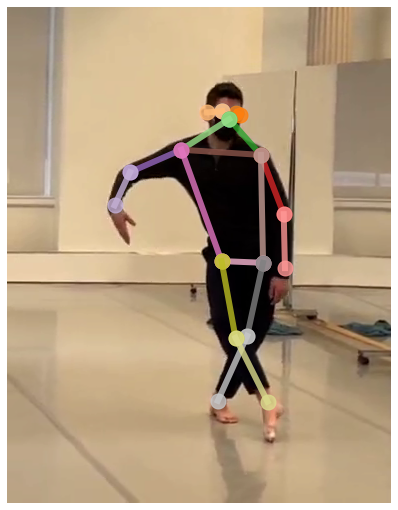

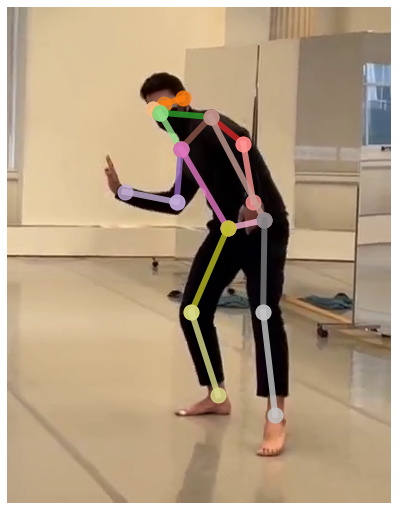

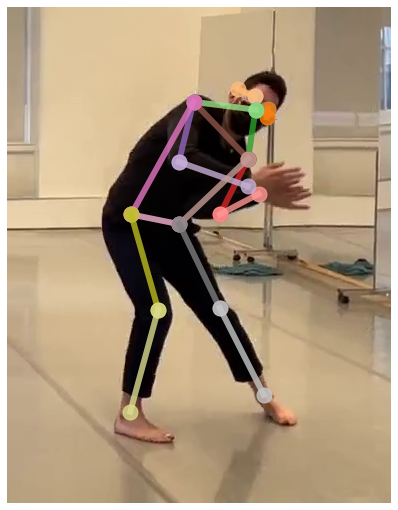

In [3]:
target_fidxs = [109, 179, 290]
ref1 = utils.NODES.left_hip
ref2 = utils.NODES.right_hip


target_poses = []
for fidx in target_fidxs:
    # Get data
    pose = trx[fidx]
    img = utils.read_frame(video_path, fidx)

    # Plot visualization
    viz_path = f"data/target_pose.fidx={fidx}.png"
    fig = utils.plot_img(img)
    utils.plot_pose(pose, alpha=0.8)
    fig.savefig(viz_path)
    
    # Normalize pose
    norm_pose, origin, norm_factor = utils.normalize_pose(pose, ref1=ref1, ref2=ref2)
    
    # Save
    target_poses.append({
        "video_path": video_path,
        "viz_path": viz_path,
        "pose": pose.tolist(),
        "ref1": ref1,
        "ref2": ref2,
        "norm_pose": norm_pose.tolist(),
        "origin": origin.tolist(),
        "norm_factor": float(norm_factor)
    })

In [4]:
# Save target poses
with open("data/target_poses.yaml", "w") as f:
    yaml.dump(target_poses, f)